# 타이타닉 데이터셋 분석 및 전처리

이 노트북은 '../data/titanic_train.csv'에서 타이타닉 데이터셋을 로드하고 머신러닝을 위한 다양한 전처리 단계를 수행합니다.

## 필요한 라이브러리 가져오기

데이터 조작, 시각화 및 전처리를 위한 필요한 라이브러리를 가져옵니다.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 노트북 내에 표시하기 위한 설정
%matplotlib inline

# 그래프 스타일 설정
plt.style.use('seaborn-v0_8')  # 'seaborn' 대신 유효한 스타일 이름 사용
sns.set_palette('deep')

# pandas 출력 형식 개선
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## 데이터셋 로드

'../data' 디렉토리에 있는 CSV 파일에서 타이타닉 데이터셋을 로드합니다.

In [25]:
# 데이터셋 로드
file_path = "../data/titanic_train.csv"
df = pd.read_csv(file_path)

# 처음 몇 행 표시
print("타이타닉 데이터셋 크기:", df.shape)
df.head()

타이타닉 데이터셋 크기: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터셋 개요

데이터 구조, 요약 통계 및 누락된 값을 확인합니다.

In [26]:
# 열 정보 표시
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
# 요약 통계
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
# 결측치 확인
missing_data = pd.DataFrame({'Count': df.isnull().sum(), 'Percentage (%)': df.isnull().sum() / df.shape[0] * 100})
missing_data = missing_data.sort_values('Percentage (%)', ascending=False)
missing_data

,Count,Percentage (%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


## 데이터 시각화

데이터셋과 변수 간의 관계를 더 잘 이해하기 위한 시각화를 생성합니다.

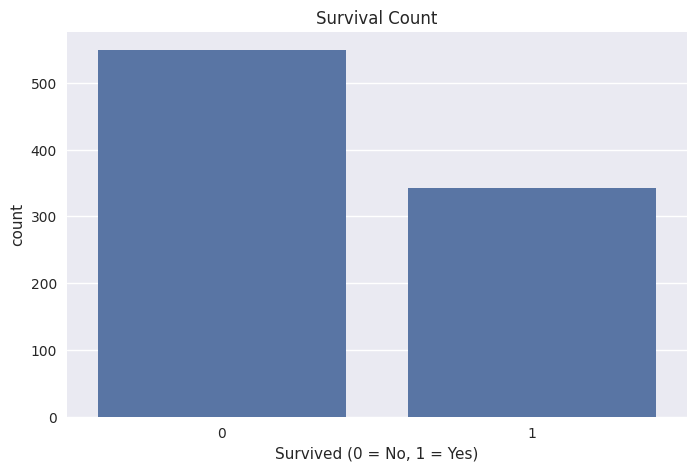

In [29]:
# 생존 수 그래프
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

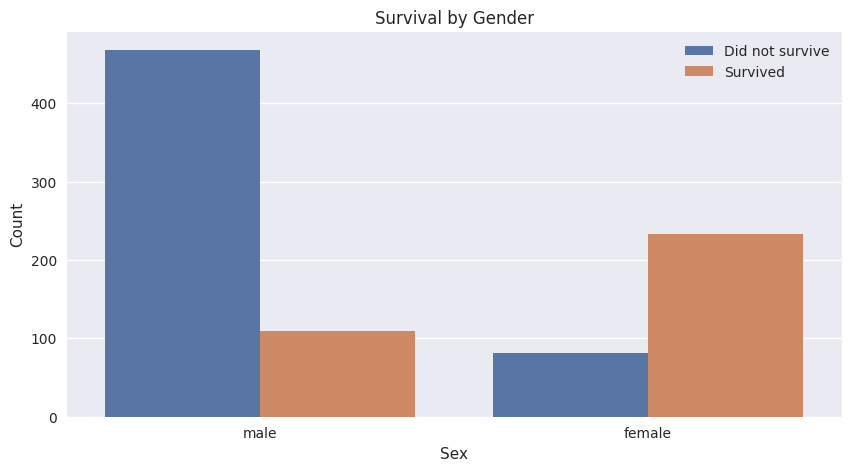

In [30]:
# 성별에 따른 생존율
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

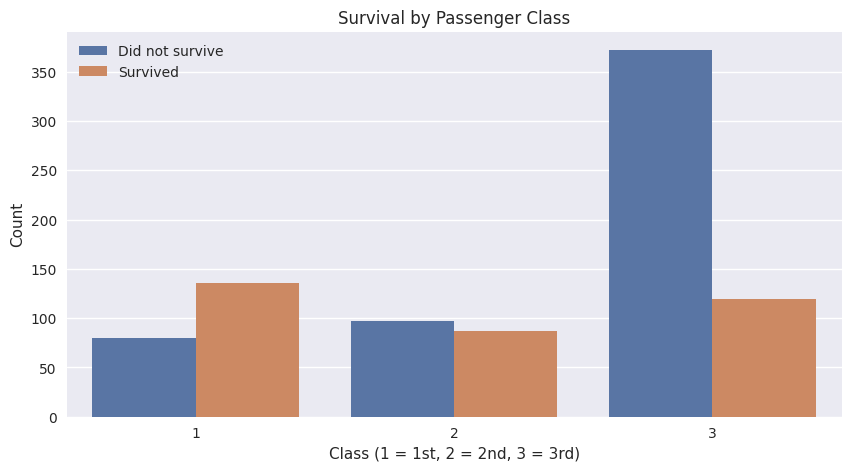

In [31]:
# 승객 등급별 생존율
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

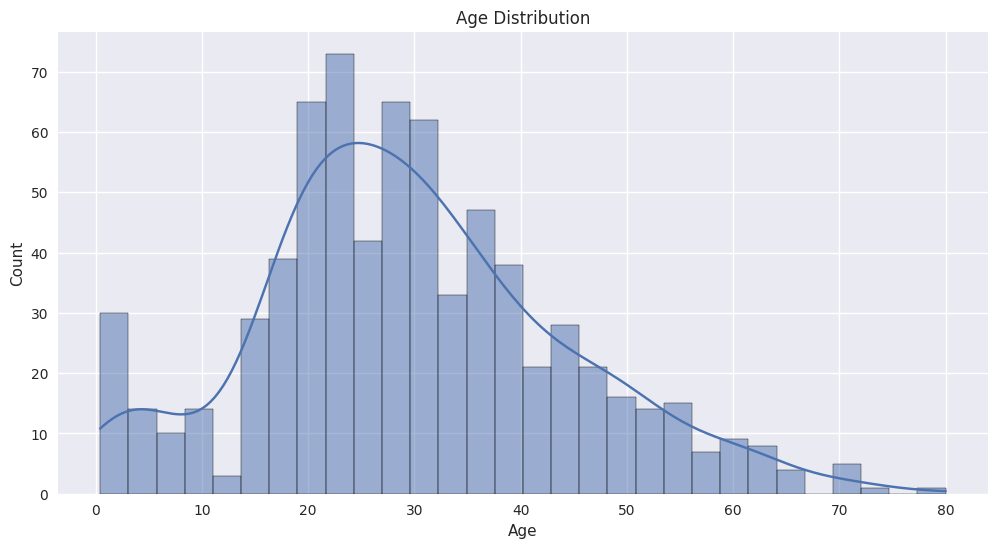

In [32]:
# 나이 분포
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

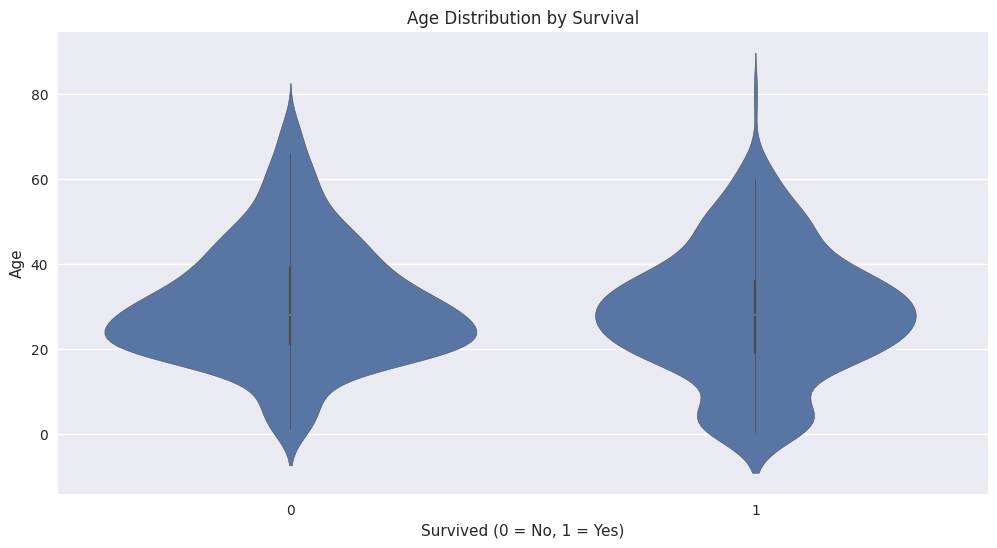

In [33]:
# 생존에 따른 나이 분포
plt.figure(figsize=(12, 6))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

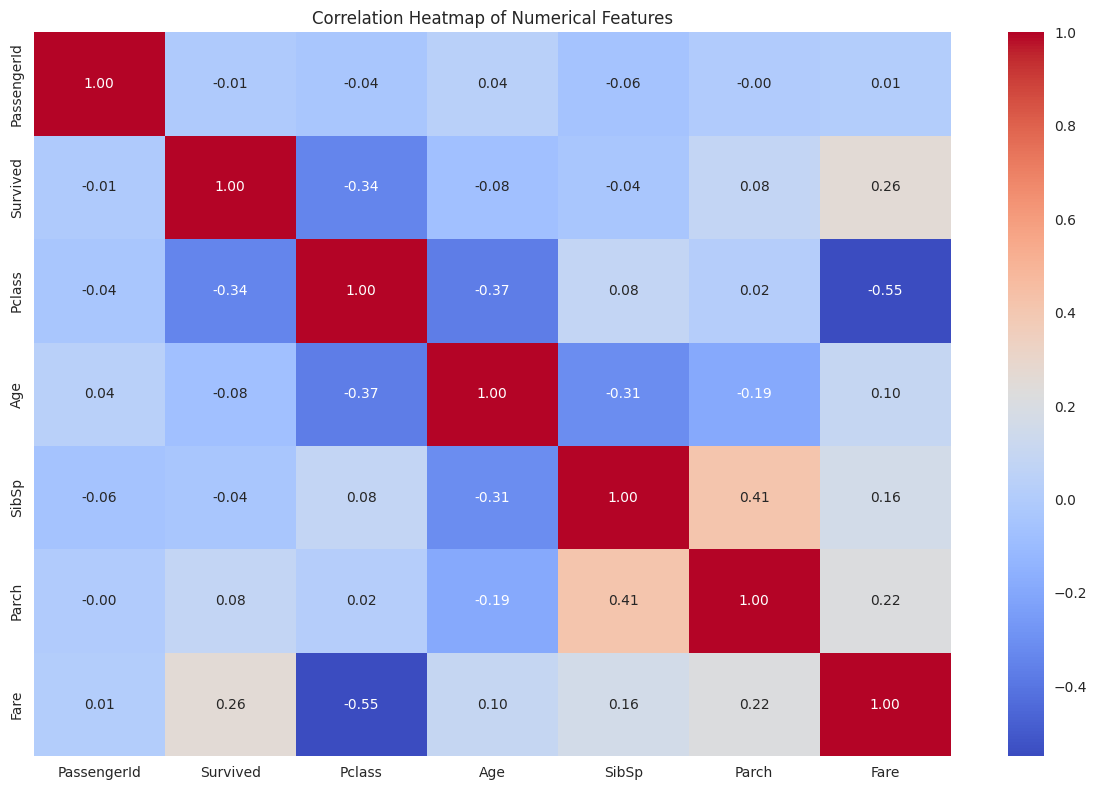

In [34]:
# 수치형 특성의 상관관계 히트맵
plt.figure(figsize=(12, 8))
numeric_data = df.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## 특성 엔지니어링

모델 성능 향상을 위해 새 특성을 생성하고 기존 특성을 변환합니다.

In [35]:
# 전처리를 위한 원본 데이터프레임 복사본 생성
processed_df = df.copy()

In [36]:
# 이름에서 호칭 추출
processed_df['Title'] = processed_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 각 호칭의 발생 빈도 계산
processed_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [37]:
# 희귀 호칭 그룹화
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Don': 'Rare',
    'Sir': 'Rare',
    'Lady': 'Rare',
    'Jonkheer': 'Rare',
    'Capt': 'Rare',
    'Countess': 'Rare',
    'Dona': 'Rare'
}

processed_df['Title'] = processed_df['Title'].map(title_mapping)
processed_df['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

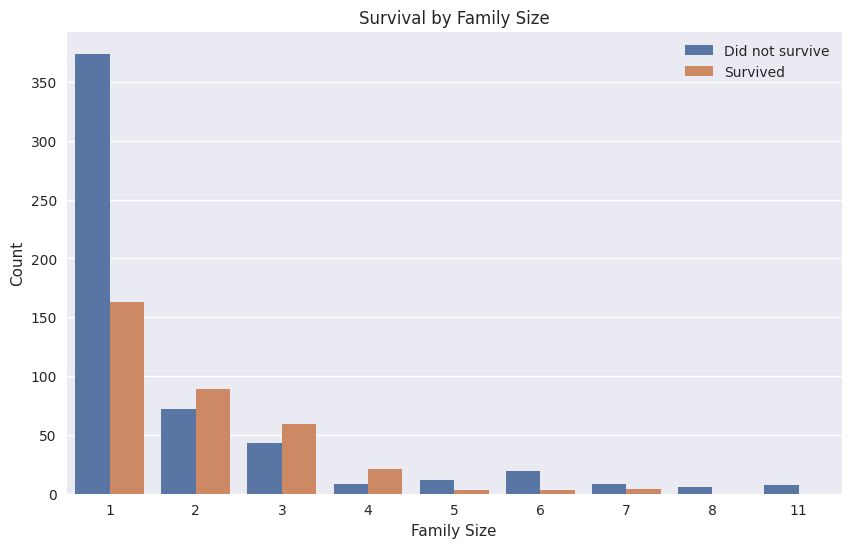

In [38]:
# 가족 크기 특성 생성
processed_df['FamilySize'] = processed_df['SibSp'] + processed_df['Parch'] + 1  # +1은 승객 본인

# 혼자 여행 여부 특성 생성
processed_df['IsAlone'] = 0
processed_df.loc[processed_df['FamilySize'] == 1, 'IsAlone'] = 1

# 가족 크기 분포 표시
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=processed_df)
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

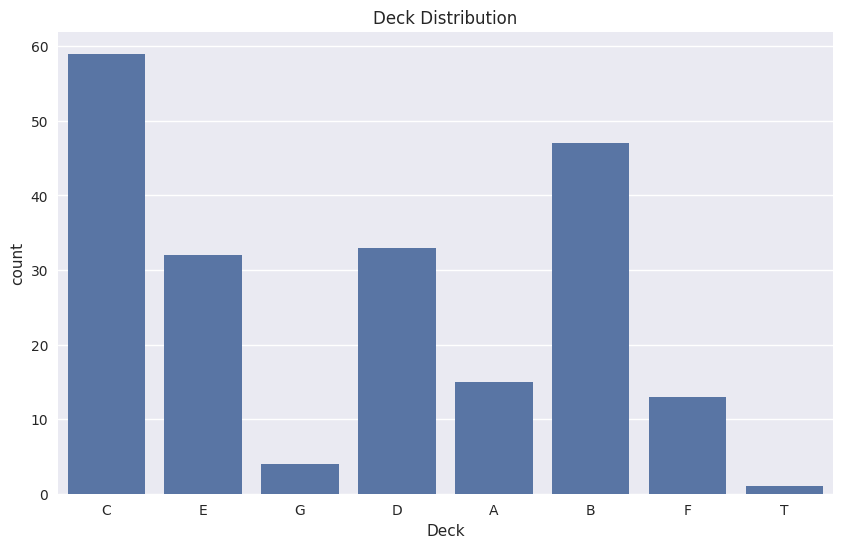

In [39]:
# 객실에서 갑판 정보 추출
processed_df['Deck'] = processed_df['Cabin'].str.extract('([A-Z])', expand=False)

# 갑판 분포 표시
plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', data=processed_df)
plt.title('Deck Distribution')
plt.xlabel('Deck')
plt.show()

## 결측치 처리

데이터셋의 결측치를 처리합니다.

In [40]:
# 호칭과 승객 등급별로 나이 결측치 채우기
for title in processed_df['Title'].unique():
    for pclass in processed_df['Pclass'].unique():
        age_median = processed_df.loc[(processed_df['Title'] == title) & 
                                     (processed_df['Pclass'] == pclass), 'Age'].median()
        age_null_indices = processed_df.loc[(processed_df['Title'] == title) & 
                                          (processed_df['Pclass'] == pclass) & 
                                          (processed_df['Age'].isnull())].index
        processed_df.loc[age_null_indices, 'Age'] = age_median

# 나이 결측치가 여전히 있는지 확인
print(f"Missing values in Age after imputation: {processed_df['Age'].isnull().sum()}")

# 여전히 결측치가 있다면 전체 중앙값 사용
if processed_df['Age'].isnull().sum() > 0:
    processed_df['Age'].fillna(processed_df['Age'].median(), inplace=True)

Missing values in Age after imputation: 0


In [41]:
# 가장 일반적인 항구로 Embarked 결측치 채우기
most_common_port = processed_df['Embarked'].mode()[0]
processed_df['Embarked'].fillna(most_common_port, inplace=True)

# 승객 등급별 중앙값으로 요금 결측치 채우기
for pclass in processed_df['Pclass'].unique():
    fare_median = processed_df.loc[processed_df['Pclass'] == pclass, 'Fare'].median()
    processed_df.loc[(processed_df['Fare'].isnull()) & (processed_df['Pclass'] == pclass), 'Fare'] = fare_median

# 다시 결측치 확인
missing_after = pd.DataFrame({'Count': processed_df.isnull().sum(), 
                             'Percentage (%)': processed_df.isnull().sum() / processed_df.shape[0] * 100})
missing_after = missing_after.sort_values('Percentage (%)', ascending=False)
missing_after.head(10)  # 결측치가 여전히 있는 열만 표시

/tmp/ipykernel_9674/1560366960.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['Embarked'].fillna(most_common_port, inplace=True)


,Count,Percentage (%)
Cabin,687,77.104377
Deck,687,77.104377
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


## 범주형 인코딩

범주형 변수를 수치 형식으로 변환합니다.

In [42]:
# Sex(성별) 특성 인코딩
processed_df['Sex'] = processed_df['Sex'].map({'female': 1, 'male': 0})

# Embarked(승선 항구) 특성 원-핫 인코딩
embarked_dummies = pd.get_dummies(processed_df['Embarked'], prefix='Embarked')
processed_df = pd.concat([processed_df, embarked_dummies], axis=1)

# Title(호칭) 특성 원-핫 인코딩
title_dummies = pd.get_dummies(processed_df['Title'], prefix='Title')
processed_df = pd.concat([processed_df, title_dummies], axis=1)

# Pclass(승객 등급) 원-핫 인코딩
pclass_dummies = pd.get_dummies(processed_df['Pclass'], prefix='Pclass')
processed_df = pd.concat([processed_df, pclass_dummies], axis=1)

## 특성 스케일링

모델 성능 향상을 위해 수치형 특성을 스케일링합니다.

In [43]:
# StandardScaler 가져오기
from sklearn.preprocessing import StandardScaler

# 스케일링할 수치형 특성 선택
numeric_features = ['Age', 'Fare', 'FamilySize']

# 스케일러 객체 생성
scaler = StandardScaler()

# 선택한 특성들 스케일링
processed_df[numeric_features] = scaler.fit_transform(processed_df[numeric_features])

## 특성 선택

모델 훈련에 가장 관련성 높은 특성을 선택합니다.

In [44]:
# 불필요한 열 삭제
columns_to_drop = ['Name', 'PassengerId', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Pclass', 'SibSp', 'Parch']
final_df = processed_df.drop(columns_to_drop, axis=1)

# 최종 데이터셋 확인
print("Final dataset shape:", final_df.shape)
final_df.head()

Final dataset shape: (891, 18)


,Survived,Sex,Age,Fare,FamilySize,IsAlone,Deck,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3
0,0,0,-0.529205,-0.502445,0.059160,0,NaN,False,False,True,False,False,True,False,False,False,False,True
1,1,1,0.657447,0.786845,0.059160,0,C,True,False,False,False,False,False,True,False,True,False,False
2,1,1,-0.232542,-0.488854,-0.560975,1,NaN,False,False,True,False,True,False,False,False,False,False,True
3,1,1,0.434950,0.420730,0.059160,0,C,False,False,True,False,False,False,True,False,True,False,False
4,0,0,0.434950,-0.486337,-0.560975,1,NaN,False,False,True,False,False,True,False,False,False,False,True


## ML을 위한 데이터셋 준비

특성과 타겟 변수를 분리합니다.

In [45]:
# 특성과 타겟 정의
X = final_df.drop('Survived', axis=1)
y = final_df['Survived']

# 특성 이름 표시
print("Features for model training:")
print(X.columns.tolist())
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features for model training:
['Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Deck', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Pclass_1', 'Pclass_2', 'Pclass_3']

Features shape: (891, 17)
Target shape: (891,)


In [46]:
# 전처리된 데이터 저장
X.to_csv('../data/preprocessed_features.csv', index=False)
y.to_csv('../data/preprocessed_target.csv', index=False)

print("Preprocessed data successfully saved!")

Preprocessed data successfully saved!


## 요약

타이타닉 데이터셋을 성공적으로 로드, 탐색, 전처리했습니다. 전처리된 데이터는 머신러닝 모델 훈련을 위한 준비가 완료되었습니다.